In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [3]:
# creating an empty list to store values from the csv
times = []
detector_11_data = []
riu_data = []

# parsing the csv data
with open('/Users/aryellewright/Documents/Kumar-Biomaterials-Lab/time_vs_RI_plots/DIP 50 HEMA 50 STAT 090123_interpolated.csv', 'r') as file:
    reader = csv.reader(file)

    # skipping the headers row (row 1)
    next(reader)

    # looping through the csv file after starting at 2 to skip the header
    for line_num, row in enumerate(reader, start=2):  

        # checking to see if a row is empty
        if not row:
            # if the row is empty, it skips to next iteration of the loop
            continue 
        try:
            times.append(float(row[0]))
            detector_11_data.append(float(row[10]))  # index 10 = detector 11
            try:
                riu_value = float(row[18])  # Index 18 corresponds to RIU data
            except ValueError:
                riu_value = np.nan  # Use NaN for missing/invalid data
            riu_data.append(riu_value)
        except IndexError:
            print(f'Error processing line {line_num}: {row}')
        except ValueError:
            print(f'Invalid data format on line {line_num}: {row}')
    

In [34]:
# normalizing the y-axis 
min_val = min(detector_11_data)
max_val = max(detector_11_data)
normalized_data_11 = [(val - min_val) / (max_val - min_val) for val in detector_11_data]

In [35]:
# normalizing the RIU data

max_abs_val_riu = max(abs(min(riu_data)), abs(max(riu_data)))
normalized_data_riu = [val / max_abs_val_riu for val in riu_data]

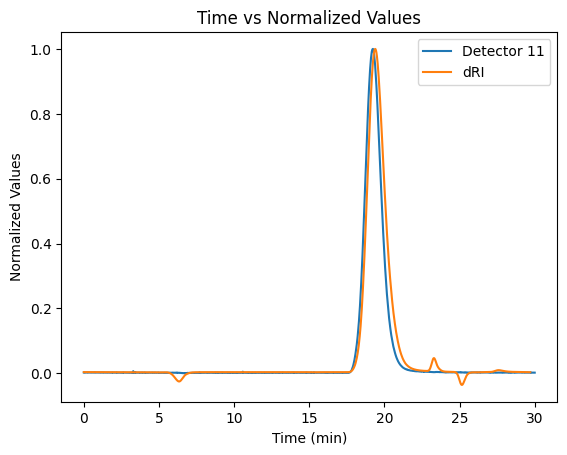

In [36]:
# plotting the normalized data
plt.plot(times, normalized_data_11, label='Detector 11')
plt.plot(times, normalized_data_riu, label='dRI')

plt.xlabel('Time (min)')
plt.ylabel('Normalized Values')
plt.title('Time vs Normalized Values')
plt.legend()
plt.show()